## Import Statement

In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats

## Load the dataset

In [236]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data preprocessing including visualization

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [238]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [239]:
df.shape

(1599, 12)

In [240]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [241]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Detection and Replacing the Outliers

In [242]:
def detection(column):

    plt.figure(figsize=(16,8))
    
    plt.subplot(2,2,1)
    sns.boxplot(df[column])
    
    plt.subplot(2,2,2)
    sns.distplot(df[column])
    
    plt.show()

In [243]:
def replacing(upper_limit,lower_limit,column):
        df[column]=np.where(df[column]>upper_limit,
                       upper_limit,
                       np.where(
                           df[column]<lower_limit,
                           lower_limit,
                           df[column]                           
                       )
                    )

In [244]:
def zscore(column):
    upper_limit = df[column].mean()+3*df[column].mean()
    lower_limit = df[column].mean()-3*df[column].mean()
    replacing(upper_limit,lower_limit,column)

In [248]:
def IQRMethod(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3-q1
    upper_limit = q3+1.5*IQR
    lower_limit = q3-1.5*IQR
    median = df[column].median()
    replacing(upper_limit,lower_limit,column)

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


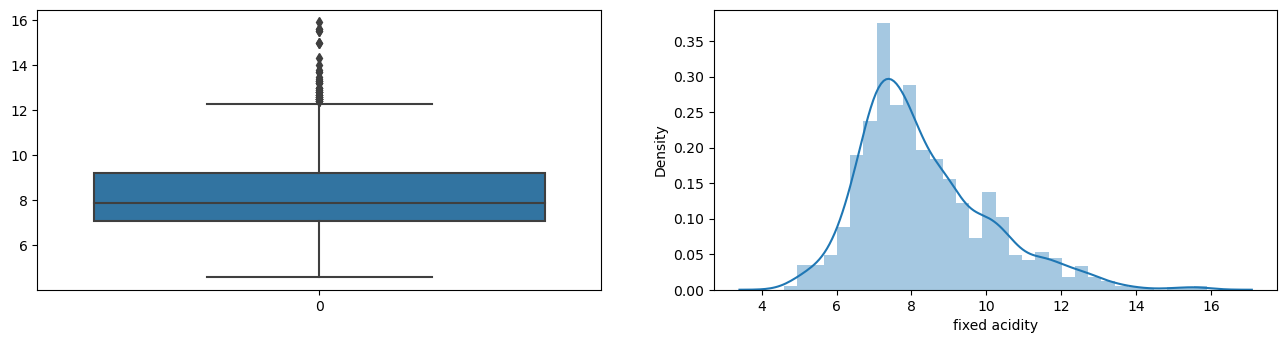

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


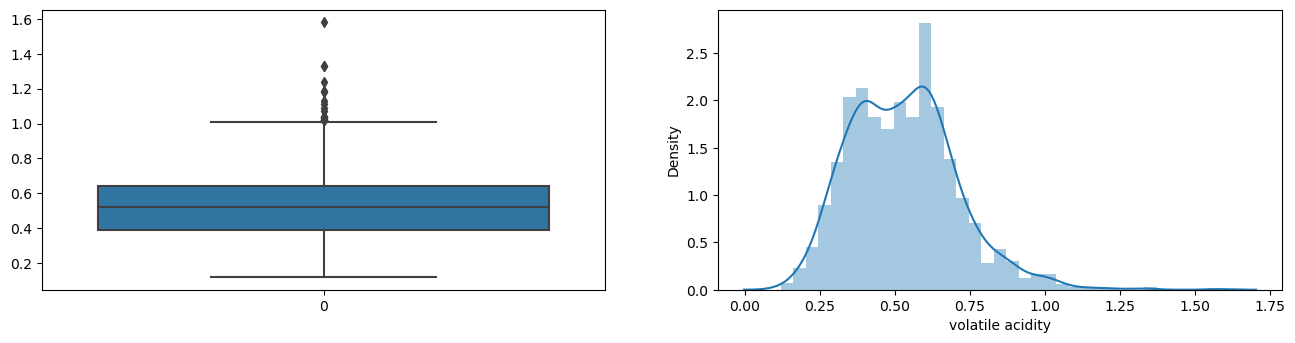

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


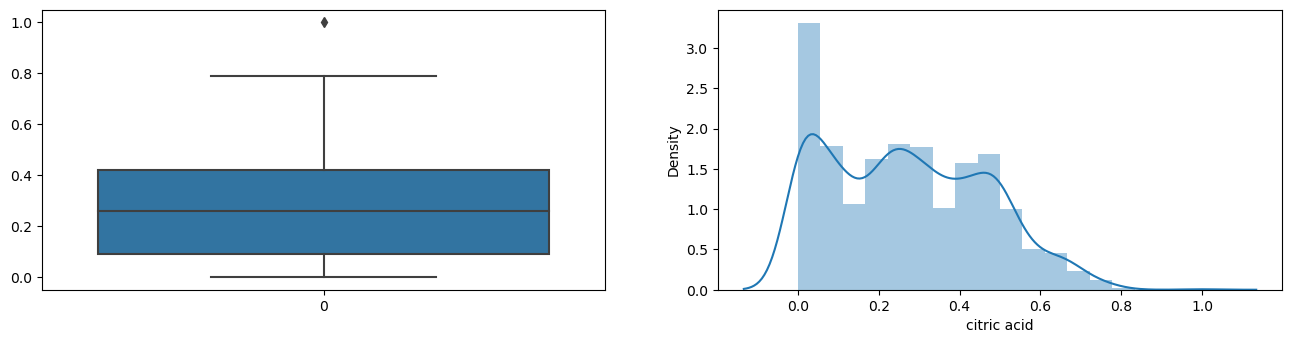

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


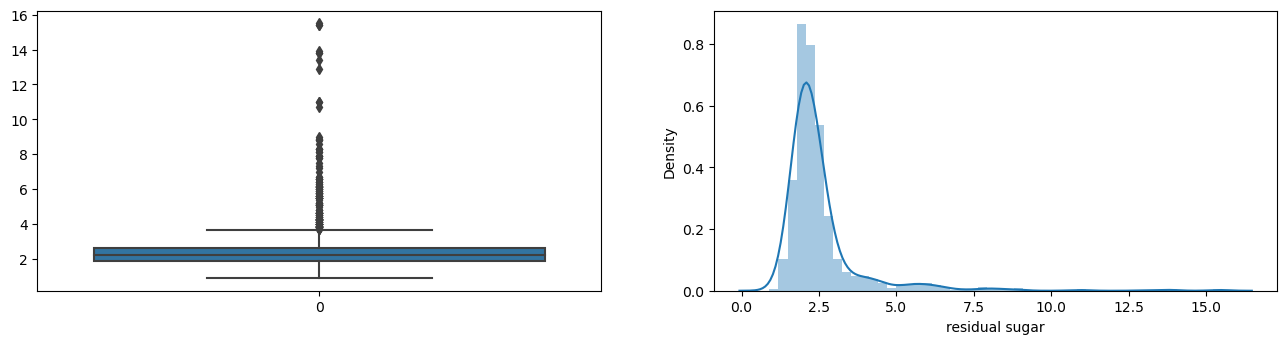

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


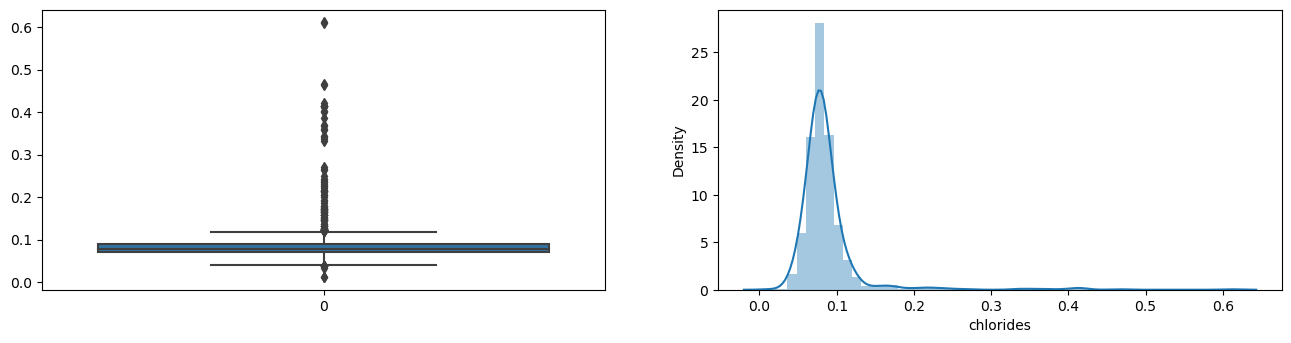

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


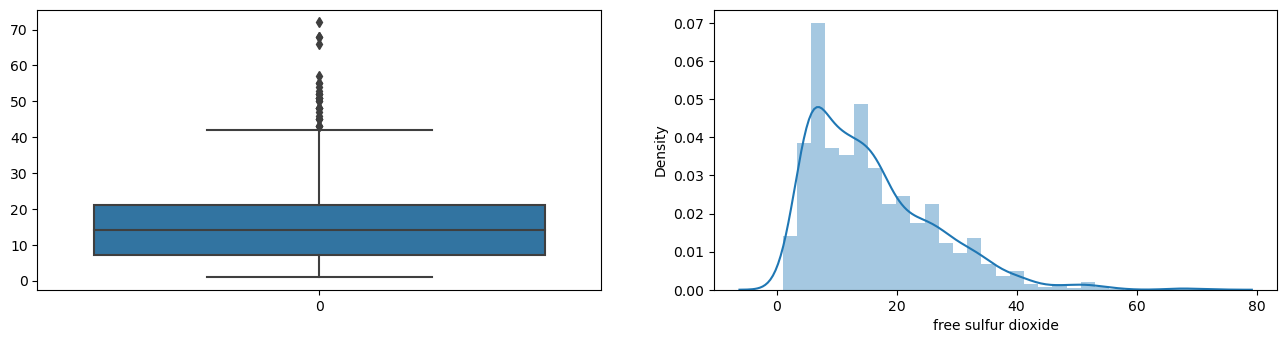

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


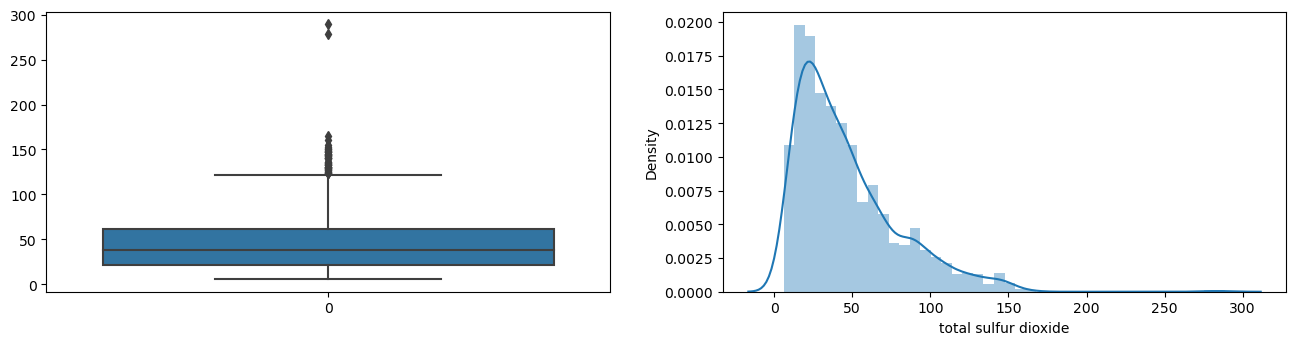

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


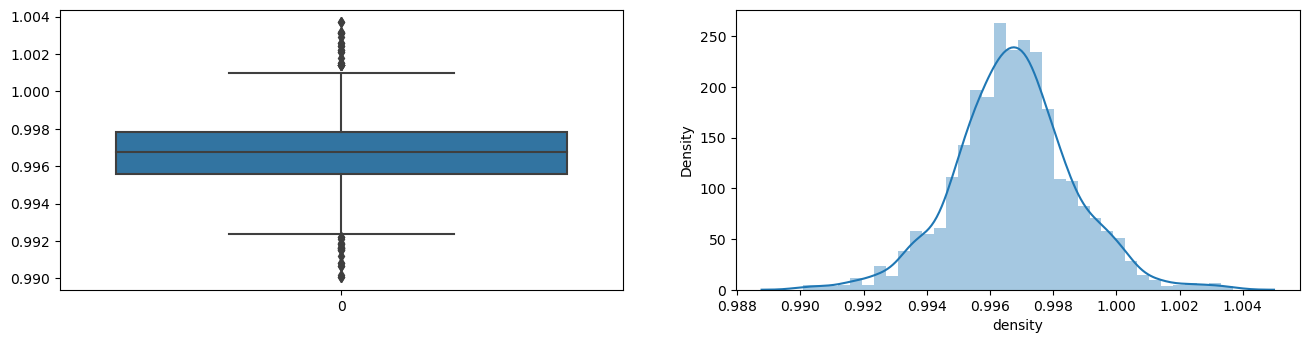

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


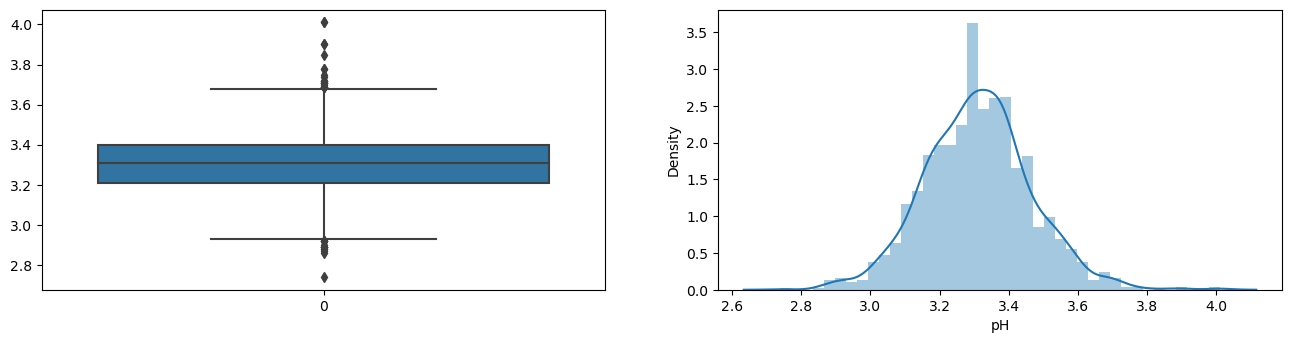

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


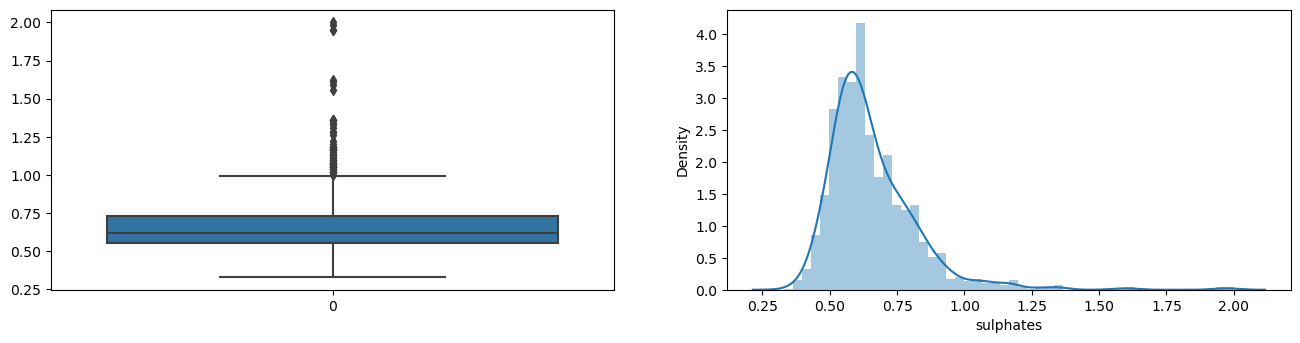

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


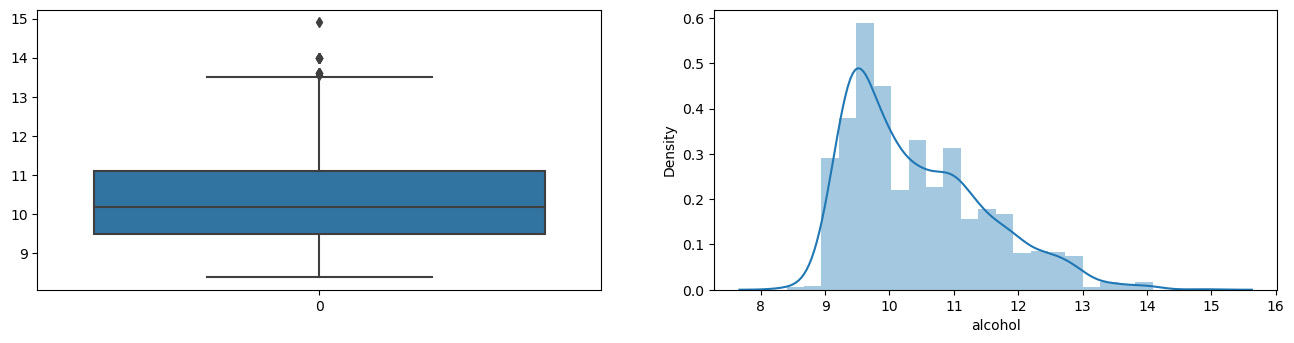

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


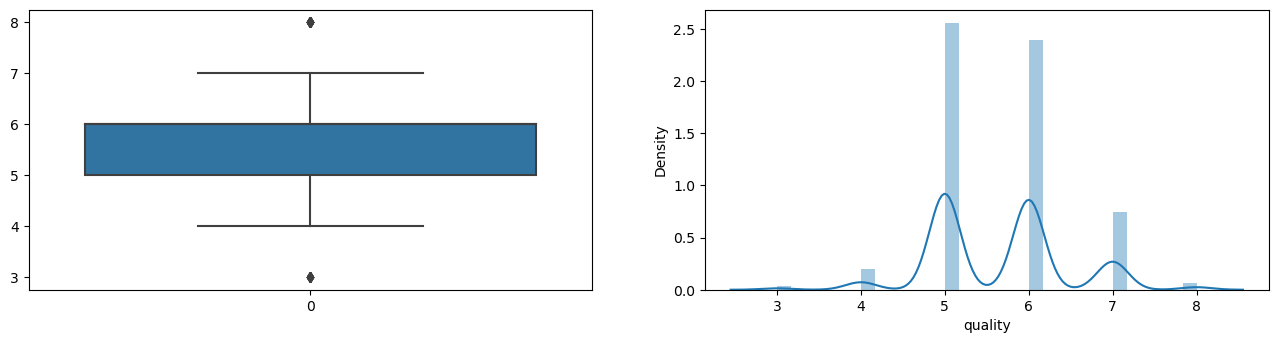

In [249]:
for column in df.columns:
    detection(column)

In [250]:
IQRMethod('fixed acidity')

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


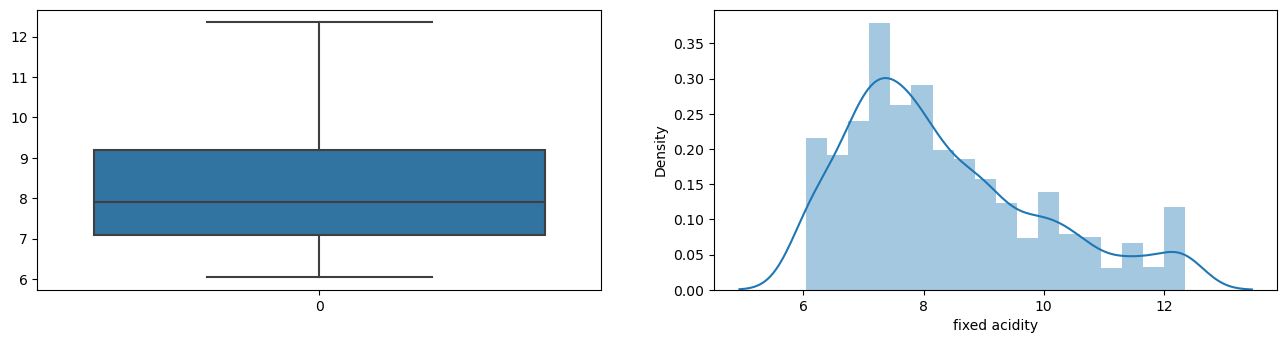

In [251]:
detection('fixed acidity')

In [252]:
IQRMethod('residual sugar')

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


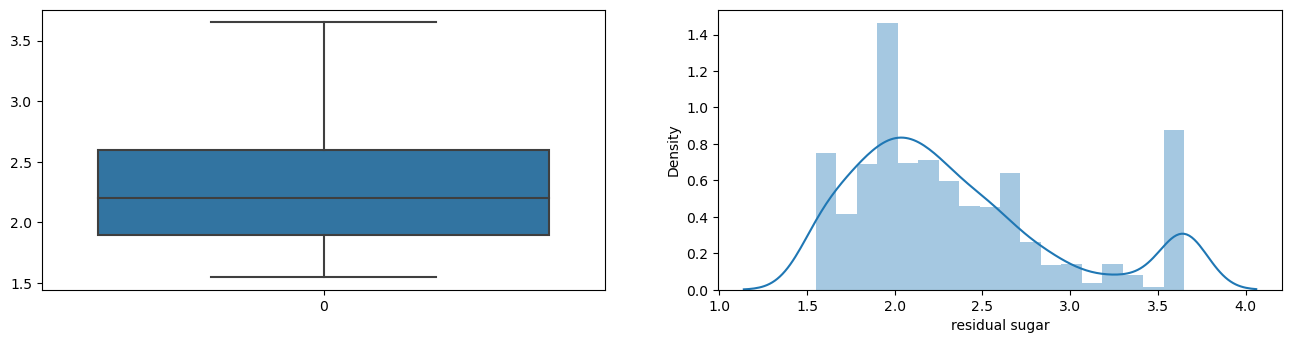

In [253]:
detection('residual sugar')

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


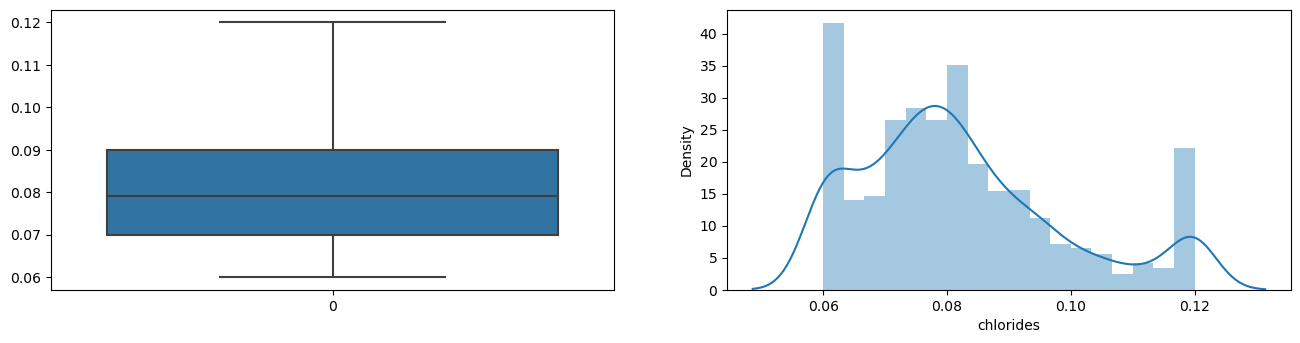

In [254]:
IQRMethod('chlorides')
detection('chlorides')

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


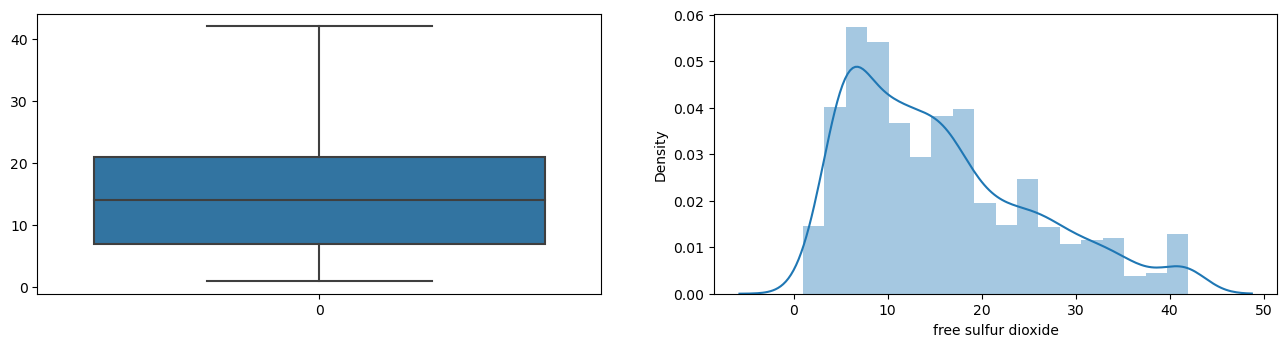

In [255]:
IQRMethod('free sulfur dioxide')
detection('free sulfur dioxide')

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


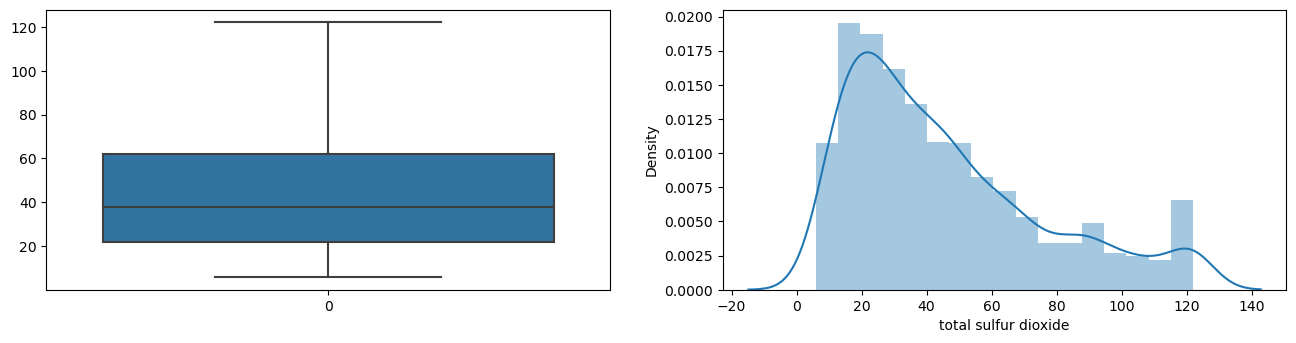

In [256]:
IQRMethod('total sulfur dioxide')
detection('total sulfur dioxide')

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


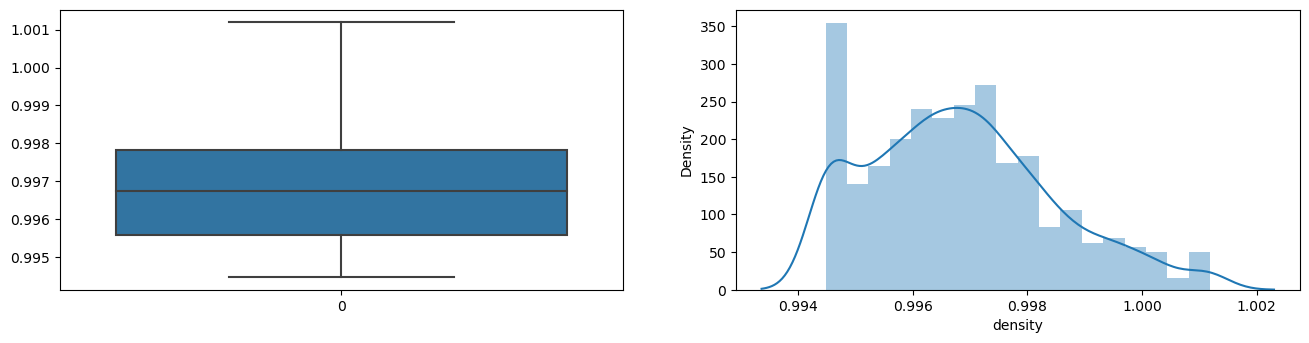

In [257]:
IQRMethod('density')
detection('density')

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


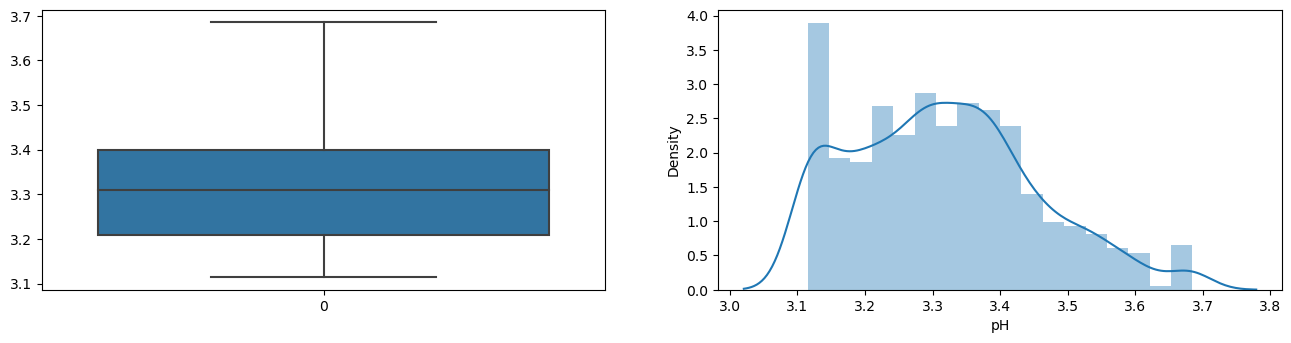

In [258]:
IQRMethod('pH')
detection('pH')

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


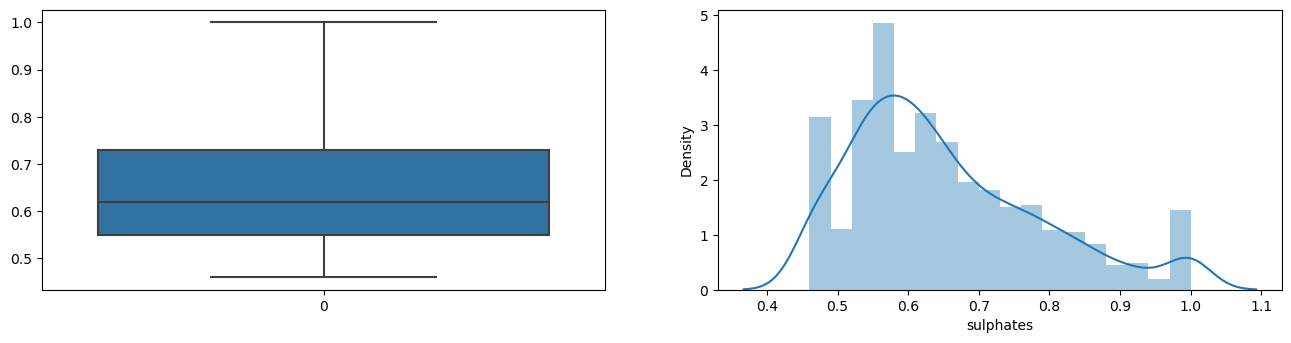

In [259]:
IQRMethod('sulphates')
detection('sulphates')

C:\Users\USER\AppData\Local\Temp\ipykernel_14080\1810645112.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


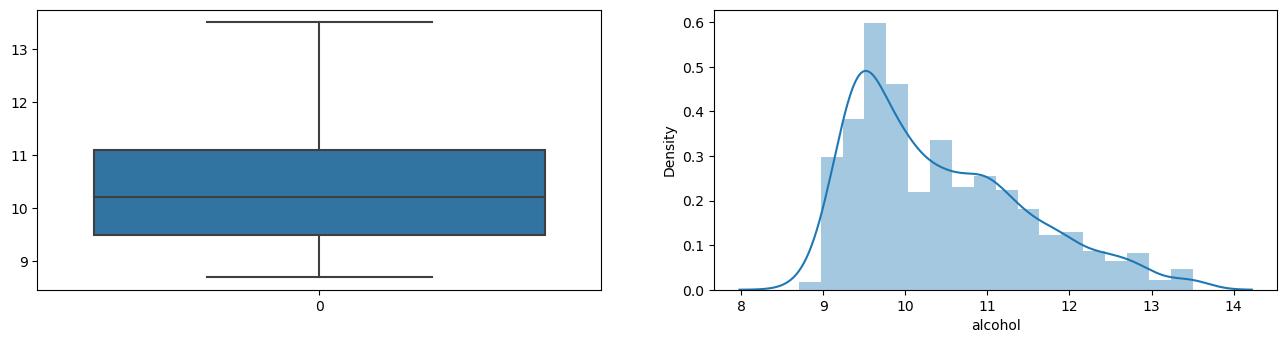

In [260]:
IQRMethod('alcohol')
detection('alcohol')

<Axes: >

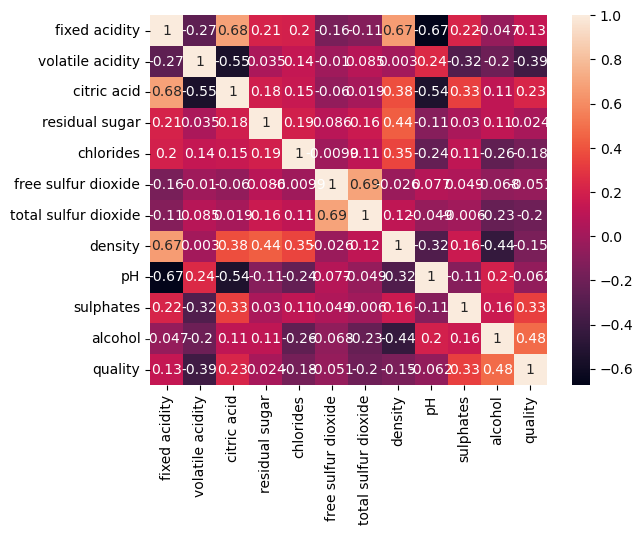

In [261]:
sns.heatmap(df.corr(),annot=True)

## Machine Learning Model building

In [262]:
X=df.drop(columns=['quality'],axis=1)

In [263]:
y=df.quality

In [264]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [278]:
scaled_X=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
scaled_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.214286,0.397260,0.00,0.166667,0.266667,0.243902,0.241379,0.494780,0.692982,0.185185,0.145833
1,0.277778,0.520548,0.00,0.500000,0.633333,0.585366,0.525862,0.345638,0.149123,0.407407,0.229167
2,0.277778,0.438356,0.04,0.357143,0.533333,0.341463,0.413793,0.375466,0.254386,0.351852,0.229167
3,0.817460,0.109589,0.56,0.166667,0.250000,0.390244,0.465517,0.524609,0.078947,0.222222,0.229167
4,0.214286,0.397260,0.00,0.166667,0.266667,0.243902,0.241379,0.494780,0.692982,0.185185,0.145833
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.023810,0.328767,0.08,0.214286,0.500000,0.756098,0.327586,0.062267,0.587719,0.222222,0.375000
1595,0.000000,0.294521,0.10,0.309524,0.033333,0.926829,0.387931,0.095078,0.710526,0.555556,0.520833
1596,0.039683,0.267123,0.13,0.357143,0.266667,0.682927,0.293103,0.187547,0.535088,0.537037,0.479167
1597,0.000000,0.359589,0.12,0.214286,0.250000,0.756098,0.327586,0.147278,0.798246,0.462963,0.312500


In [288]:
x_train,x_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.2,random_state=0)

In [289]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [290]:
model.fit(x_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [291]:
pred=model.predict(x_test)

In [292]:
print(pred)

[6 5 7 5 6 5 5 6 5 5 5 5 6 5 6 7 7 6 6 5 6 5 6 5 5 5 5 7 5 6 6 6 6 5 6 6 5
 6 6 6 5 6 7 7 6 5 5 6 5 6 5 5 5 6 6 5 5 5 7 5 5 6 6 6 5 6 5 6 7 6 5 6 5 5
 5 6 5 5 5 7 6 5 6 6 6 5 6 5 5 5 5 5 6 5 6 5 6 5 5 6 7 6 6 6 5 5 5 5 6 5 6
 5 6 5 6 6 6 7 6 6 5 6 6 5 6 6 5 5 6 7 5 5 6 6 7 5 6 5 6 5 6 5 5 5 6 6 6 7
 6 5 6 6 5 6 6 5 5 5 6 6 6 6 7 5 6 5 6 6 5 6 6 5 5 7 6 6 6 7 6 5 5 7 5 6 6
 5 5 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 6 6 6 5 6 6 6 6 5 5 6
 6 6 5 6 6 6 5 5 5 6 5 6 6 6 6 7 6 6 5 5 5 5 6 5 5 5 5 7 5 5 5 5 6 5 5 5 5
 5 6 6 5 6 5 5 5 5 6 6 5 6 5 6 6 6 6 5 6 7 5 7 6 7 6 5 5 5 7 6 6 6 6 5 5 6
 5 5 5 5 6 5 5 5 6 6 5 5 5 5 6 6 5 5 5 7 6 6 5 6]


## Evaluate the model

In [293]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [294]:
accuracy_score(y_test,pred)

0.63125

In [295]:
confusion_matrix(y_test,pred)

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   7,   4,   0,   0],
       [  0,   0, 104,  31,   0,   0],
       [  0,   0,  39,  89,  14,   0],
       [  0,   0,   2,  16,   9,   0],
       [  0,   0,   0,   1,   2,   0]], dtype=int64)

In [296]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.68      0.77      0.72       135
           6       0.63      0.63      0.63       142
           7       0.36      0.33      0.35        27
           8       0.00      0.00      0.00         3

    accuracy                           0.63       320
   macro avg       0.28      0.29      0.28       320
weighted avg       0.60      0.63      0.61       320



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Test with random observation

In [299]:
print(f"Predicted Value : {model.predict([[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]])[0]}")

Predicted Value : 5


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
